<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGIOparte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import math

m = 100
n = 2
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([-9.23,  6.38, -2.  ,  8.65, -9.34, -7.21, -7.71, -2.12,  2.99,
       -8.92,  8.3 ,  8.72, -0.55,  9.55, -8.49,  3.91,  4.86, -5.03,
        8.24,  7.07,  5.21,  1.51,  3.86, -6.58, -6.56, -8.29,  0.83,
       -0.42, -5.93, -1.55,  0.57, -9.65,  2.76, -6.47, -2.17,  1.93,
        1.81,  8.76, -7.91, -6.42,  6.44, -8.31, -2.71, -5.48, -1.5 ,
        4.94,  6.53,  1.4 ,  0.5 , -1.36, -2.06, -3.15, -2.46, -9.56,
        6.14,  8.54,  1.89, -9.89,  7.11,  9.92, -0.19, -4.59, -1.14,
       -7.96,  6.68,  9.84,  4.49, -0.61, -5.14, -9.81,  1.78,  0.19,
       -1.22,  4.88,  6.31, -7.34,  9.25,  7.93, -7.29,  4.85,  9.56,
        4.33,  4.64, -7.95, -7.7 ,  1.63, -5.97,  4.17, -9.19,  5.52,
       -3.02, -4.  ,  8.54, -6.13, -2.42, -3.37,  9.23, -0.6 ,  2.79,
       -5.74])

In [ ]:
x = np.random.randint(1,20, n)
print(x)

[16  4]


In [ ]:
def f(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return np.log(totalsum)
f(x)


189.16

In [ ]:
def fsinLog(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = ((a[i-1][j-1])*x[j-1]) + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        #print(aux)
        totalsum = totalsum + aux2
        #print(totalsum)
        i = i + 1
    return totalsum
fsinLog(x)

1.4162639375663535e+82

In [ ]:
def fdx(x):
    # print(x)
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,0)
        # print(a.item(i-1,j-1))
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = 0
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = a[i-1][j-1]*x[j-1] + b[i-1]
          totalexp = totalexp + aux
          j = j +1
        aux2 = math.exp(totalexp)*a.item(i-1,1)
            # print(a.item(i-1,j-1))

        totalsum2 = totalsum2 + aux2
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2])

fdx(x)

array([8.98, 9.05])

In [ ]:
def backtrack4(x0, f, fdx, t = 1, alpha = 0.4, beta = 0.9):
    
    point = x0 #Necessary to ensure matrix form
    print(point)
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
        #  print(t)
    return t

backtrack4(x, f, fdx)

[16  4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


1

In [ ]:
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.000000001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0), iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

grad(x, 20)

[16  4]
[ 7.02 -5.05] 115.10740764419035 [ 9.42609842 -7.64552224] 1
[ 7.02 -5.05]
[-2.40609842  2.59552224] 52.49056343046206 [-3.88133598  9.25885226] 2
[-2.40609842  2.59552224]
[-0.90238934 -0.99154683] 31.916146805439702 [-3.07694243 -9.28885614] 3
[-0.90238934 -0.99154683]
[-0.44055678  0.40266064] 24.661944452392422 [-3.74509667  8.83645636] 4
[-0.44055678  0.40266064]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


[-0.2227804  -0.11117697] 22.016853341073983 [-3.2555522  -6.41966744] 5
[-0.2227804  -0.11117697]
[-0.13223425  0.06737221] 21.35969328715424 [-1.47848732  2.92447609] 6
[-0.13223425  0.06737221]
[-0.09522541 -0.00583198] 21.23990260178172 [-1.4776864  -1.19199795] 7
[-0.09522541 -0.00583198]
[-0.05823662  0.02400559] 21.20091992941491 [-0.48674051  1.05303385] 8
[-0.05823662  0.02400559]
[-0.04605275 -0.00235349] 21.186520449489386 [-0.55240369 -0.44154947] 9
[-0.04605275 -0.00235349]
[-0.03360798  0.00759391] 21.18134367772819 [-0.18612115  0.3271556 ] 10
[-0.03360798  0.00759391]
[-0.02843142 -0.00150521] 21.179664608978538 [-0.1937506  -0.17390232] 11
[-0.02843142 -0.00150521]
[-0.02406653  0.00241253] 21.17901949166631 [-0.0565397   0.12357389] 12
[-0.02406653  0.00241253]
[-0.02265125 -0.00068072] 21.178819399756 [-0.0664548  -0.05045445] 13
[-0.02265125 -0.00068072]
[-0.02098779  0.00058224] 21.178749162647527 [-0.01666739  0.0487325 ] 14
[-0.02098779  0.00058224]
[-0.0206123  

(array([-0.01956412, -0.00046486]), 21.178710307735262, 21)

In [ ]:
x00= np.arange(-0.1, 0.1, 0.0001)
#print(x0)
y=[]
for i in x00:
    y.append(f([-0.019501,i]))
    #print(f([0.1,i]))

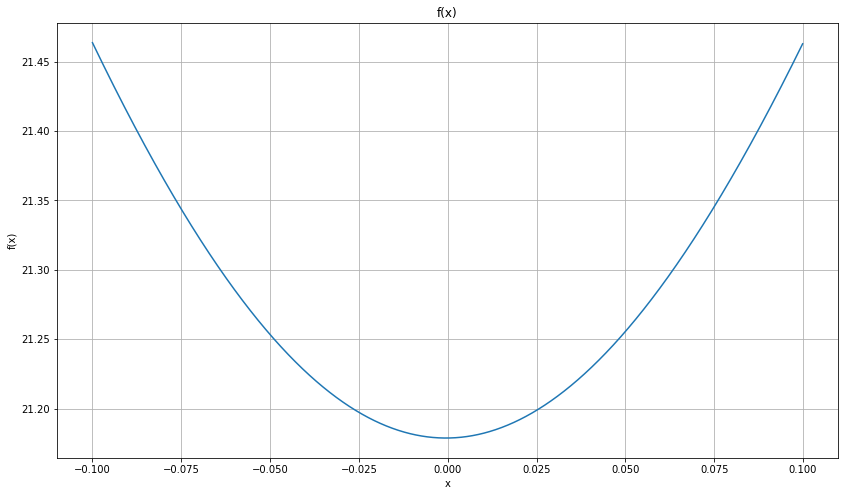

por evaluaciónes: 21.178710247369832
por optimización: 21.17871024593665


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(x00,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print("por evaluaciónes: "+str(min(y)))
print("por optimización: "+str(f([-0.019501 , -0.0005068])))

In [ ]:
def lambda_sq(fdx, Hessian, point):
    lambda_sq = np.dot(np.dot(fdx(point) ,npla.pinv(Hessian(point))) , fdx(point).T)
    
     return(np.asscalar(lambda_sq))
     
def delta_x(fdx, Hessian, point):
    delta_x = np.dot(-npla.pinv(Hessian(point)) , fdx(point).T)
    return(delta_x)

#eps is the tolerance condition to exit out of the while loop
def newtons_method(x, eps=0.00001, max_iters=20000):
    
    iters = 1
    lmb_sq = lambda_sq(fdx, Hessian, x)
    #In while loop we are checking the magnitude of Newton's decrement. If it's below tolerance we exit out.
    while((lmb_sq/2.0) > eps):
        
        # Compute delta_x and lambda_sq
        dlt_x = delta_x(fdx, Hessian, x)
        #Line search for stepsize
        t = backtrack2(x, f, fdx)
        # Update x
        x = np.array((x + np.dot(t , dlt_x)))[0]
       
        # Update lmb_sq, see if we still stay in the loop
        lmb_sq = lambda_sq(fdx, Hessian, x)
        
        iters += 1
        
        if(iters > max_iters):
            break
return(x, f(x), iters)
#Test
newtons_method([2.0,2.0])